In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import defaultdict


In [2]:
job_data=pd.read_csv("all_upwork_jobs.csv")

In [3]:
job_data

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,NaN,NaN,500.0,NaN
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,NaN,NaN,1100.0,United States
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,NaN,United States
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,NaN,NaN,NaN,United States
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,NaN,NaN,650.0,India
...,...,...,...,...,...,...,...,...
244823,Need Facebook advertising experts to launch pr...,https://www.upwork.com/jobs/Need-Facebook-adve...,2024-03-24 13:28:38+00:00,True,20.0,100.0,NaN,Zambia
244824,Digital/Telemarketing/Sales/OutSide Sales,https://www.upwork.com/jobs/Digital-Telemarket...,2024-03-24 13:40:52+00:00,False,NaN,NaN,100.0,Sri Lanka
244825,WordPress Template Edits,https://www.upwork.com/jobs/WordPress-Template...,2024-03-24 13:37:50+00:00,True,5.0,30.0,NaN,United States
244826,ELEMENTOR PRO For quick fix (Wordpress),https://www.upwork.com/jobs/ELEMENTOR-PRO-For-...,2024-03-24 13:52:15+00:00,False,NaN,NaN,15.0,France


In [4]:
job_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244828 entries, 0 to 244827
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   title           244827 non-null  object 
 1   link            244827 non-null  object 
 2   published_date  244828 non-null  object 
 3   is_hourly       244828 non-null  bool   
 4   hourly_low      102422 non-null  float64
 5   hourly_high     98775 non-null   float64
 6   budget          103891 non-null  float64
 7   country         239751 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 13.3+ MB


In [5]:
job_data.isnull().sum()

title                  1
link                   1
published_date         0
is_hourly              0
hourly_low        142406
hourly_high       146053
budget            140937
country             5077
dtype: int64

In [6]:
job_data = job_data.dropna(subset=['title', 'link'])

In [7]:
job_data.isnull().sum()

title                  0
link                   0
published_date         0
is_hourly              0
hourly_low        142405
hourly_high       146052
budget            140936
country             5076
dtype: int64

In [8]:
hourly_low_median = job_data['hourly_low'].median()
hourly_high_median = job_data['hourly_high'].median()

# Fill the missing values with the respective medians
job_data['hourly_low'].fillna(hourly_low_median, inplace=True)
job_data['hourly_high'].fillna(hourly_high_median, inplace=True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_18852\3359405391.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['hourly_low'].fillna(hourly_low_median, inplace=True)
C:\Users\pooji\AppData\Local\Temp\ipykernel_18852\3359405391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['hourly_high'].fillna(hourly_high_median, inplace=True)


In [9]:
median_budget = job_data['budget'].median()
job_data['budget'].fillna(median_budget, inplace=True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_18852\390661608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['budget'].fillna(median_budget, inplace=True)


In [10]:
job_data['country'].fillna('Other', inplace=True)

C:\Users\pooji\AppData\Local\Temp\ipykernel_18852\1612707280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['country'].fillna('Other', inplace=True)


In [11]:
print(job_data.isnull().sum())

title             0
link              0
published_date    0
is_hourly         0
hourly_low        0
hourly_high       0
budget            0
country           0
dtype: int64


In [12]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()

# Function to lemmatize keywords
def lemmatize_keyword(keyword):
    return lemmatizer.lemmatize(keyword)

# Extract and lemmatize keywords from job titles
def extract_keywords(title):
    # Convert title to lowercase and remove punctuation
    title = re.sub(r'[^\w\s]', '', title.lower())
    # Tokenize the title
    tokens = word_tokenize(title)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    keywords = [lemmatize_keyword(token) for token in tokens if token not in stop_words]
    return keywords

In [15]:
job_data['keywords'] = job_data['title'].apply(extract_keywords)

# Flatten the list of keywords
keywords_flat = [keyword for sublist in job_data['keywords'] for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = Counter(keywords_flat)


C:\Users\pooji\AppData\Local\Temp\ipykernel_18852\2702865317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data['keywords'] = job_data['title'].apply(extract_keywords)


In [16]:
top_10_keywords = keyword_counts.most_common(10)
top_10_keywords_df = pd.DataFrame(top_10_keywords, columns=['Keyword', 'Frequency'])
top_10_keywords

[('website', 17570),
 ('needed', 17568),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('design', 13512),
 ('designer', 12839),
 ('need', 10604),
 ('amp', 9275),
 ('specialist', 9047)]

In [17]:
combined_keywords = {
    'website': keyword_counts['website'],
    'need': keyword_counts['needed'] + keyword_counts['need'],
    'video': keyword_counts['video'],
    'developer': keyword_counts['developer'],
    'expert': keyword_counts['expert'],
    'design': keyword_counts['design'] + keyword_counts['designer'],
    'amp': keyword_counts['amp'],
    'specialist': keyword_counts['specialist']
}

# Sort combined keywords by frequency
sorted_combined_keywords = sorted(combined_keywords.items(), key=lambda item: item[1], reverse=True)


In [18]:
top_10_combined_keywords = sorted_combined_keywords[:10]
top_10_combined_keywords_df = pd.DataFrame(top_10_combined_keywords, columns=['Keyword', 'Frequency'])
top_10_combined_keywords

[('need', 28172),
 ('design', 26351),
 ('website', 17570),
 ('video', 16188),
 ('developer', 15996),
 ('expert', 15251),
 ('amp', 9275),
 ('specialist', 9047)]

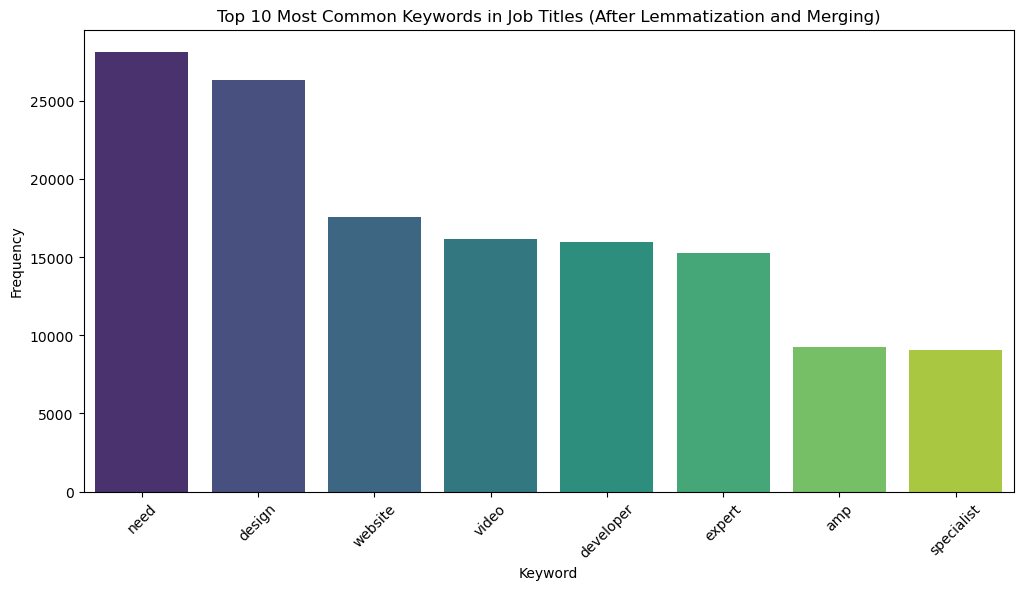

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_combined_keywords_df, x='Keyword', y='Frequency', palette='viridis')
plt.title('Top 10 Most Common Keywords in Job Titles (After Lemmatization and Merging)')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [20]:
keyword_salary_data = defaultdict(lambda: {'salary_sum': 0, 'count': 0})

# Calculate total salary and count for each keyword
for index, row in job_data.iterrows():
    budget = row['budget']
    for keyword in row['keywords']:
        keyword_salary_data[keyword]['salary_sum'] += budget
        keyword_salary_data[keyword]['count'] += 1

# Calculate average salary for each keyword
keyword_avg_salary = {k: v['salary_sum'] / v['count'] for k, v in keyword_salary_data.items()}

In [21]:
keyword_salary_df = pd.DataFrame(keyword_avg_salary.items(), columns=['Keyword', 'Average_Salary'])
keyword_salary_df = keyword_salary_df.sort_values(by='Average_Salary', ascending=False)
keyword_salary_df.head(10)

,Keyword,Average_Salary
44520,martkeplace,1000000.000000
47270,1mmonth,1000000.000000
38834,token2022,999999.000000
45983,representant,400000.000000
15775,responsivo,350050.000000
20251,independence,334533.333333
32363,webseries,300150.000000
2280,telco,166314.166667
38833,140k,140000.000000
20675,practioner,125050.000000


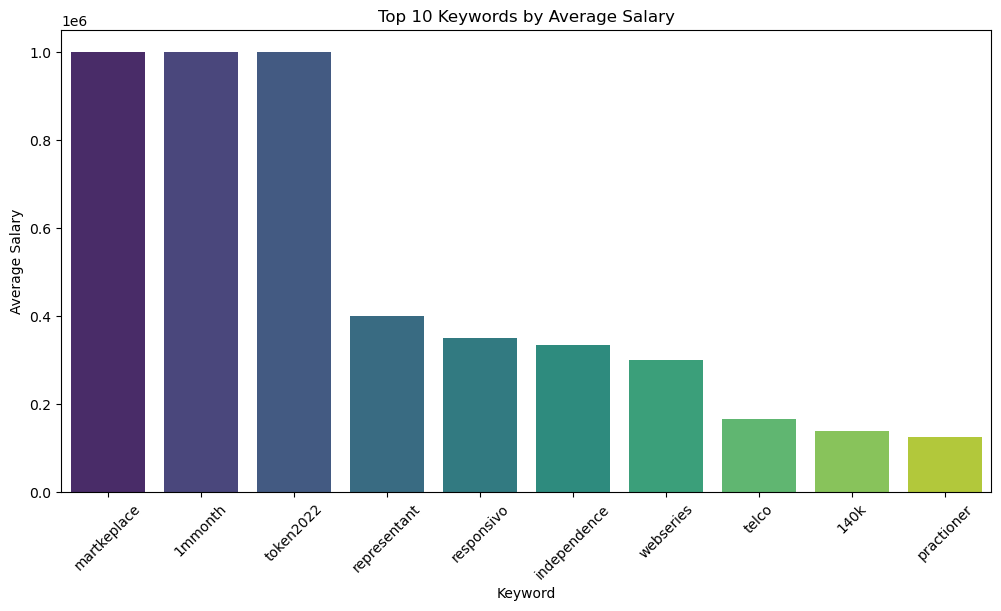

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=keyword_salary_df.head(10), x='Keyword', y='Average_Salary', palette='viridis')
plt.title('Top 10 Keywords by Average Salary')
plt.xlabel('Keyword')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

In [23]:
job_data.head()

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,"[smma, bubble, app]"
3,Talent Hunter Specialized in Marketing,https://www.upwork.com/jobs/Talent-Hunter-Spec...,2024-02-17 09:08:08+00:00,True,15.0,30.0,100.0,United States,"[talent, hunter, specialized, marketing]"
4,Data Engineer,https://www.upwork.com/jobs/Data-Engineer_%7E0...,2024-02-17 09:07:42+00:00,False,15.0,30.0,650.0,India,"[data, engineer]"


In [24]:
keyword_salary_df

,Keyword,Average_Salary
44520,martkeplace,1000000.0
47270,1mmonth,1000000.0
38834,token2022,999999.0
45983,representant,400000.0
15775,responsivo,350050.0
...,...,...
31077,sporthub,5.0
13200,denford,5.0
15821,flierlogo,5.0
15822,designampphoto,5.0


In [25]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
correlation_results = {}

# Iterate over each keyword
for keyword in keyword_avg_salary.keys():
    # Calculate the presence of the keyword in each job title
    keyword_salary_df[keyword] = keyword_salary_df['Keyword'].apply(lambda x: 1 if keyword in x else 0)
    # Calculate correlation between keyword presence and salary
    correlation = np.corrcoef(keyword_salary_df[keyword], keyword_salary_df['Average_Salary'])[0, 1]
    correlation_results[keyword] = correlation

# Convert correlation results dictionary to DataFrame
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Keyword', 'Correlation'])

In [48]:
correlation_df

,Keyword,Correlation
0,experienced,-0.000476
1,medium,-0.000224
2,buyer,-0.000824
3,solar,-0.000472
4,pannel,-0.000136
...,...,...
48406,arbitragemev,-0.000174
48407,autopopulating,-0.000174
48408,zapierairtable,-0.000245
48409,overthetopcomic,-0.000199


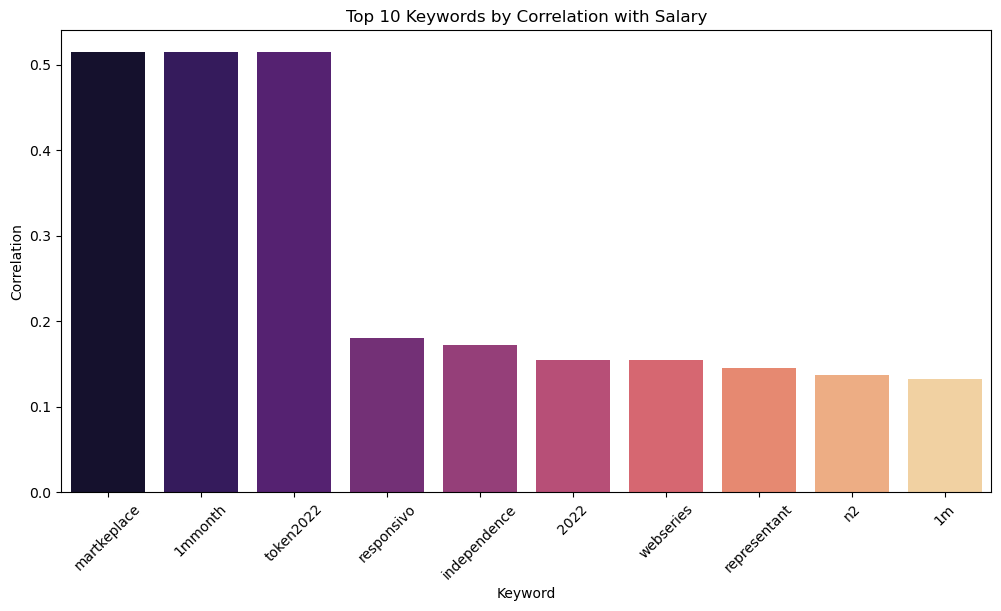

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=correlation_df.sort_values(by='Correlation', ascending=False).head(10), x='Keyword', y='Correlation', palette='magma')
plt.title('Top 10 Keywords by Correlation with Salary')
plt.xlabel('Keyword')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

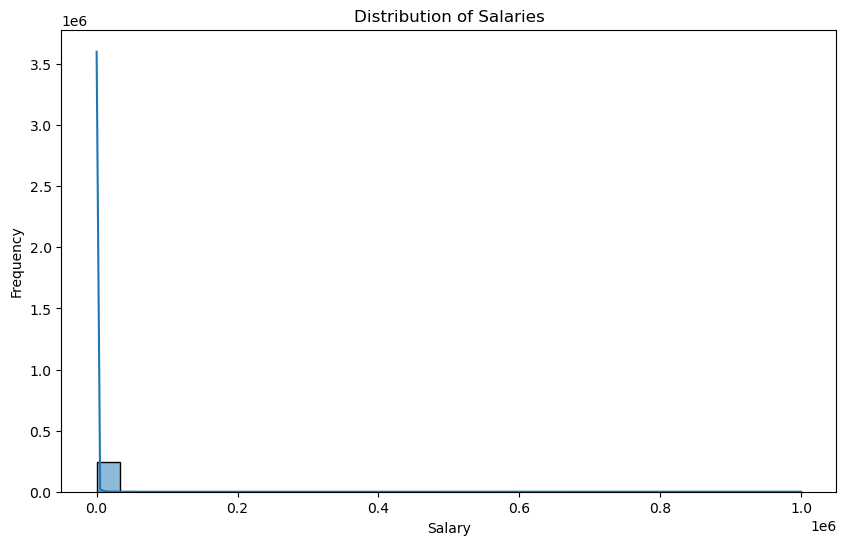

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(job_data['budget'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

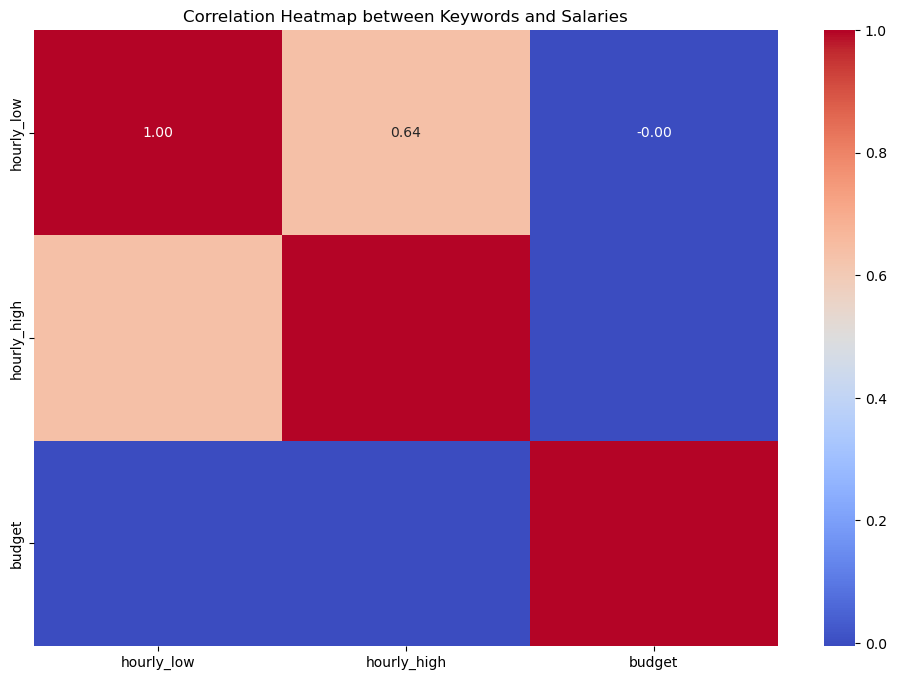

In [31]:
numeric_data = job_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Keywords and Salaries')
plt.show()

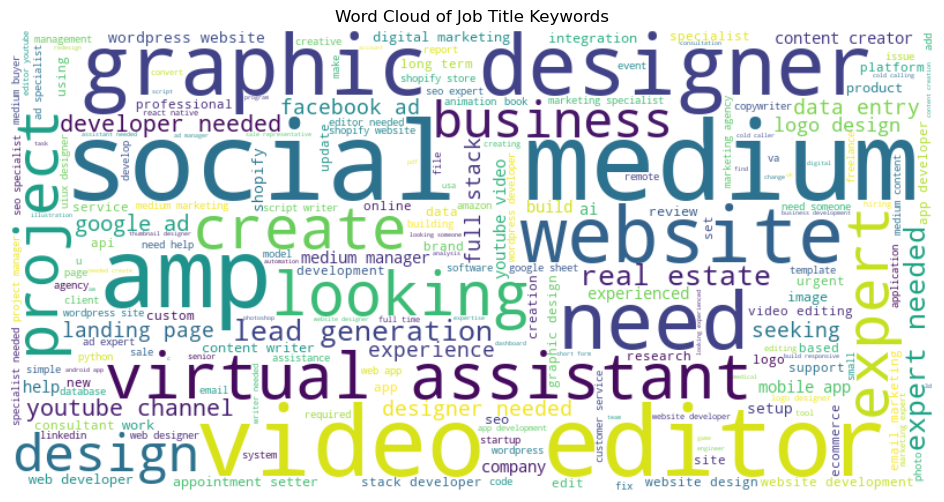

In [32]:
from wordcloud import WordCloud

# Word cloud of job title keywords
keywords_text = ' '.join(job_data['keywords'].explode().dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Job Title Keywords')
plt.axis('off')
plt.show()

#### Task 2: Identify emerging job categories based on posting frequency

In [33]:
categories = {
    'Data Science': ['data scientist', 'data analyst', 'machine learning', 'AI', 'artificial intelligence'],
    'Software Development': ['developer', 'programmer', 'software engineer', 'coder'],
    'Design': ['designer', 'graphic design', 'UI/UX', 'web design'],
    'Marketing': ['marketing', 'digital marketing', 'SEO', 'content marketing', 'social media'],
    'Sales': ['sales', 'sales representative', 'account manager', 'business development', 'sales executive'],
    'Finance': ['finance', 'financial analyst', 'accountant', 'investment banker', 'auditor'],
    'Human Resources': ['HR', 'human resources', 'recruiter', 'talent acquisition', 'HR manager'],
    'Customer Service': ['customer service', 'customer support', 'call center', 'client service', 'customer care'],
    'Healthcare': ['nurse', 'doctor', 'physician', 'healthcare', 'medical assistant'],
    'Engineering': ['engineer', 'mechanical engineer', 'civil engineer', 'electrical engineer', 'industrial engineer'],
    'Education': ['teacher', 'educator', 'instructor', 'professor', 'tutor'],
    'Project Management': ['project manager', 'project coordinator', 'project lead', 'scrum master'],
    'Consulting': ['consultant', 'business consultant', 'management consultant', 'strategy consultant'],
    'IT Support': ['IT support', 'help desk', 'technical support', 'IT technician', 'IT specialist'],
    'Legal': ['lawyer', 'attorney', 'legal assistant', 'paralegal', 'legal advisor'],
    'Operations': ['operations manager', 'operations analyst', 'supply chain', 'logistics', 'operations coordinator'],
    'Product Management': ['product manager', 'product owner', 'product development', 'product strategist'],
    'Writing and Editing': ['writer', 'editor', 'content writer', 'copywriter', 'proofreader'],
    'Research': ['researcher', 'research assistant', 'clinical research', 'market research', 'scientist'],
    'Administration': ['administrative assistant', 'office manager', 'executive assistant', 'receptionist'],
    'Real Estate': ['real estate agent', 'property manager', 'real estate broker', 'leasing agent'],
    'Construction': ['construction worker', 'foreman', 'construction manager', 'site supervisor'],
    'Hospitality': ['hospitality', 'hotel manager', 'chef', 'cook', 'event planner'],
    'Manufacturing': ['manufacturing', 'factory worker', 'production manager', 'assembly line worker'],
    'Retail': ['retail', 'store manager', 'cashier', 'sales associate', 'merchandiser']
}


In [34]:
job_data['published_date'] = pd.to_datetime(job_data['published_date'])

In [36]:
job_data.head(3)

,title,link,published_date,is_hourly,hourly_low,hourly_high,budget,country,keywords
0,Experienced Media Buyer For Solar Pannel and R...,https://www.upwork.com/jobs/Experienced-Media-...,2024-02-17 09:09:54+00:00,False,15.0,30.0,500.0,Other,"[experienced, medium, buyer, solar, pannel, ro..."
1,Full Stack Developer,https://www.upwork.com/jobs/Full-Stack-Develop...,2024-02-17 09:09:17+00:00,False,15.0,30.0,1100.0,United States,"[full, stack, developer]"
2,SMMA Bubble App,https://www.upwork.com/jobs/SMMA-Bubble-App_%7...,2024-02-17 09:08:46+00:00,True,10.0,30.0,100.0,United States,"[smma, bubble, app]"


In [38]:
def categorize_job(title):
    for category, keywords in categories.items():
        if any(keyword in title.lower() for keyword in keywords):
            return category
    return 'Other'

job_data['category'] = job_data['title'].apply(categorize_job)



In [39]:
# Step 3: Analyze posting frequency over time
job_data['year_month'] = job_data['published_date'].dt.to_period('M')
category_trends = job_data.groupby(['year_month', 'category']).size().unstack(fill_value=0)


In [40]:
# Step 4: Calculate growth rate and identify emerging categories
growth_rate = category_trends.pct_change().fillna(0)  # Percentage change month-over-month
average_growth = growth_rate.mean()



In [41]:
# Sort categories by growth rate to identify emerging categories
emerging_categories = average_growth.sort_values(ascending=False)



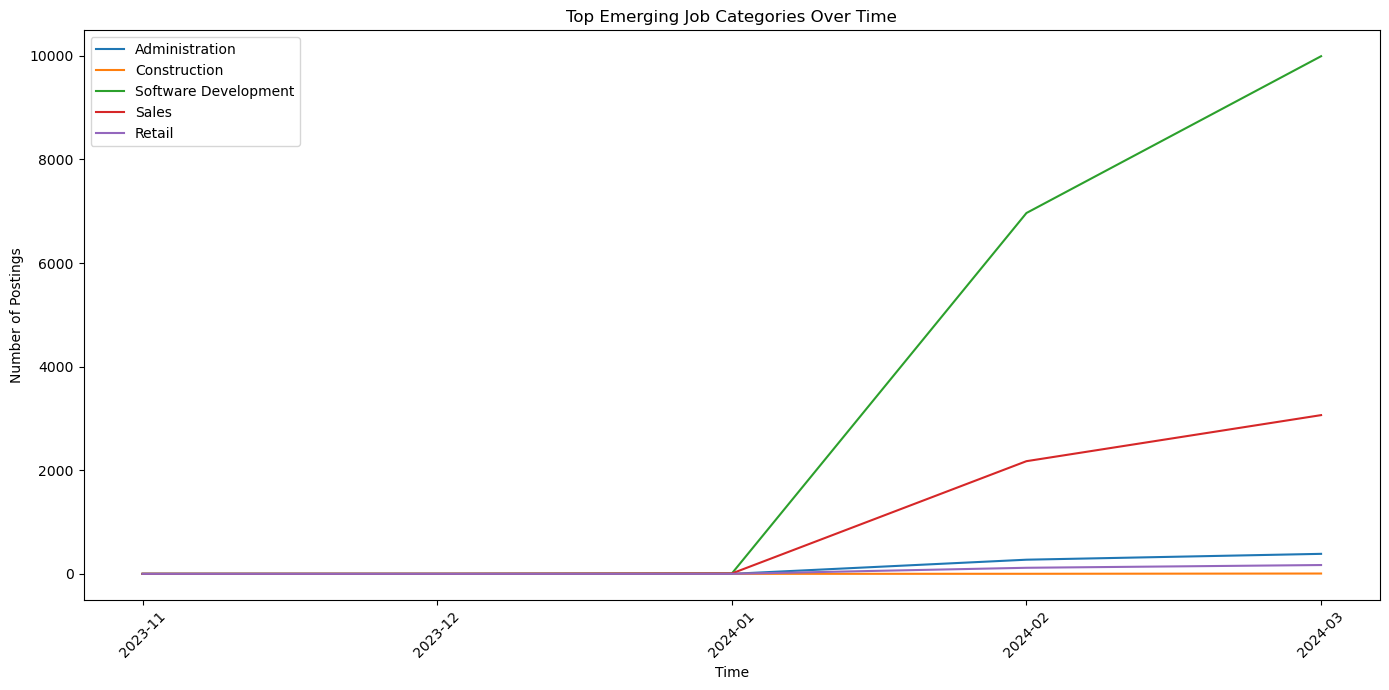

Emerging Job Categories with Average Growth Rates:
category
Administration          inf
Construction            inf
Software Development    inf
Sales                   inf
Retail                  inf
Research                inf
Real Estate             inf
Project Management      inf
Product Management      inf
Operations              inf
dtype: float64


In [44]:
# Step 5: Visualize the trends
plt.figure(figsize=(14, 7))
for category in emerging_categories.index[:5]:  # Plot top 5 emerging categories
    plt.plot(category_trends.index.astype(str), category_trends[category], label=category)

plt.title('Top Emerging Job Categories Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Postings')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the list of emerging categories with growth rates
print("Emerging Job Categories with Average Growth Rates:")
print(emerging_categories.head(10))  # Display top 10 emerging categories

In [46]:
print(emerging_categories)

category
Administration                 inf
Construction                   inf
Software Development           inf
Sales                          inf
Retail                         inf
Research                       inf
Real Estate                    inf
Project Management             inf
Product Management             inf
Operations                     inf
Marketing                      inf
Manufacturing                  inf
Legal                          inf
IT Support                     inf
Human Resources                inf
Hospitality                    inf
Healthcare                     inf
Finance                        inf
Engineering                    inf
Education                      inf
Design                         inf
Data Science                   inf
Customer Service               inf
Consulting                     inf
Writing and Editing            inf
Other                   261.991489
dtype: float64


In [51]:
import joblib

df = pd.DataFrame(job_data)
csv_filename = 'job_data.csv'
df.to_csv(csv_filename, index=False)
print(f"Data saved as {csv_filename}")

Data saved as job_data.csv
